# Project 2
# Predictive Modeling from Lending Club
## EDA

Lending club currently gives a loan a grade and sub-grade. Each grade has a range of interest level associated with it. Are these grades predictive of default (classification) or the remaining outstanding principal for portion of total amount funded by investors (regression) if a loan does default? Can we make a better model of whether or not a loanee will default? Furthermore, if a loanee does default can we predict how much the investors will be out? If there is a high probability that a loanee defaults, investors may still make a profit with a high enough interest rate. Our job is to model creditworthiness by predicting who will default and model good vs. bad investments by predicting the amount investors will be out.

The first step here is to perform an EDA on the dataset.

* 1 Data Import
    * 1.1 Missing Columns
    * 1.2 Missing Data 
* 2 Feature Transformation
    * 2.1 emp_length
    * 2.2 term
    * 2.3 categorical datatypes
        * 2.3.1 categorical columns - keep
        * 2.3.2 categorical columns - drop
    * 2.4 date columns
        * 2.4.1 date columns - keep
        * 2.4.2. date columns - drop 
* 3 Feature Engineering
    * 3.1 loan status
    * 3.2 issue_d
    * 3.3 inq_last_6mths
    * 3.4 pub_rec
    * 3.5 funded_amnt
* 4 Data Exploration
    * 4.1 loan amount
    * 4.2 default vs non-default loans
    * 4.3 issue date
    * 4.4 terms
    * 4.5 grade
    * 4.6 interest rates
    * 4.7 home wwnership
    * 4.8 purpose
    * 4.9 state
* 5 Correlation
* 6 Export

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


## 1. Data Import

In [2]:
# import our lending club data
#
# Note: I'm using the 'low_memory=False' flag to silence a memory warning.  We could specify 
# the dtypes of columns to lower the memory consumption.  The provided csv file is
# not too large, so I am fine with simply silencing the error in this particular case. 
df = pd.read_csv('../data/raw/loan.csv', index_col=0, low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 73 columns):
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status                    887379 non-null object
pymnt_plan  

### 1.1 Missing Columns
Lending club has provided us with an Excel file containing an explanation of each column.  It appears that the number columns in the Excel file differs from the data provided in our CSV.  Let's take a closer look.

In [4]:
# read data from excel file (which explains all column types)
excel_desc = pd.read_excel('../data/raw/LCDataDictionary.xlsx')

In [5]:
excel_desc

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,annual_inc_joint,The combined self-reported annual income provi...
3,application_type,Indicates whether the loan is an individual ap...
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
6,delinq_2yrs,The number of 30+ days past-due incidences of ...
7,desc,Loan description provided by the borrower
8,dti,A ratio calculated using the borrower’s total ...
9,dti_joint,A ratio calculated using the co-borrowers' tot...


In [6]:
# columns 78 & 79 are notes.  Let's remove them.
excel_desc.drop(excel_desc.index[[78, 79]], inplace=True)

In [7]:
# Build a set containing column names for both datasets
excel_col_set = set(excel_desc.LoanStatNew)
csv_col_set = set(df.columns)

# indentify differences from the Excel & CSV files
excel_col_set - csv_col_set


{'fico_range_high',
 'fico_range_low',
 'id',
 'is_inc_v',
 'last_fico_range_high',
 'last_fico_range_low',
 'total_rev_hi_lim \xa0',
 'verified_status_joint'}

It appears that we are missing a total of 8 columns as described by the excel file.  We will continue on without these columns.

### 1.2 Missing Data
Reviewing the output from the .info() command, we can see that several columns have a severe amount of data missing.  We could take two routes here:

1. We could impute the missing data.  The problem here is that when imputing large amounts of missing data we tend to introduce bias and decrease the overall variance.
2. We could simply remove columns missing large amounts of data. 

I have selected to go with option 2 for data columns which are missing more than 50% of data.  As you can see below, some columns are missing over 70% of data.  Imputing this amount of data does not make sense.  

In [8]:
from operator import itemgetter

# create a dictionary to hold the column name & missing data percentage
cols = {}

# loop through each column and find the percentage of missing data
for c in df.columns:
    cols[c] = df[c].isnull().sum() / len(df) * 100

# Our missing data threshold is set to 50%
data_threshold = 50
del_cols = []

# loop through columns and only keep those that are missing 30% of data
for k, v in sorted(cols.items(), key=itemgetter(1), reverse=True):
    if cols[k] > data_threshold:
        print('{0}: {1:.2f}'.format(k, cols[k]))
        del_cols.append(k)

dti_joint: 99.94
annual_inc_joint: 99.94
verification_status_joint: 99.94
il_util: 97.90
mths_since_rcnt_il: 97.65
open_acc_6m: 97.59
open_il_6m: 97.59
open_il_12m: 97.59
open_il_24m: 97.59
total_bal_il: 97.59
open_rv_12m: 97.59
open_rv_24m: 97.59
max_bal_bc: 97.59
all_util: 97.59
inq_fi: 97.59
total_cu_tl: 97.59
inq_last_12m: 97.59
desc: 85.80
mths_since_last_record: 84.56
mths_since_last_major_derog: 75.02
mths_since_last_delinq: 51.20


In [9]:
# drop columns that are greater than 50%
df.drop(del_cols, inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 52 columns):
member_id                     887379 non-null int64
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null object
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_title                     835922 non-null object
emp_length                    887379 non-null object
home_ownership                887379 non-null object
annual_inc                    887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
loan_status                   887379 non-null object
pymnt_plan                  

We've removed a total of 21 columns due to missing data concerns.  

## 2. Feature Transformation
Let's take a look at features that have mixed types that need to be reclassified.

### 2.1 emp_length
emp_length tracks the number of employment years for the given borrower.  It appears that employment years range from 0 to 10+ years.  We also have 'n/a', meaning the number of years of employment is not available. 

We will transform this data into an integer that represents the number of employment years
* '0' represents less than 1 year of employment.  
* '10' will represent 10 or more years of experience. 
* for the sake of this model, we will impute 'n/a' into the mean # of years for the column. 

In [10]:
df.emp_length.value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [11]:
# first replace the n/a with np.nan - this will allow us to convert the column from 'object' to 'int'
df.emp_length.replace('n/a', np.nan, inplace=True)

In [12]:
# Let's transform this into a 0-10 range
emp_length_fixed = []

for length in df.emp_length:
    if length == '< 1 year':
        emp_length_fixed.append(0)
    elif length == '1 year':
        emp_length_fixed.append(1)
    elif length == '2 years':
        emp_length_fixed.append(2)
    elif length == '3 years':
        emp_length_fixed.append(3)
    elif length == '4 years':
        emp_length_fixed.append(4)
    elif length == '5 years':
        emp_length_fixed.append(5)
    elif length == '6 years':
        emp_length_fixed.append(6)
    elif length == '7 years':
        emp_length_fixed.append(7)
    elif length == '8 years':
        emp_length_fixed.append(8)
    elif length == '9 years':
        emp_length_fixed.append(9)
    elif length == '10+ years':
        emp_length_fixed.append(10)
    else:
        emp_length_fixed.append(length)

df['emp_length'] = emp_length_fixed

In [13]:
# we can now replace np.nan with the mean of the column
df.emp_length.replace(np.nan, df.emp_length.mean(), inplace=True)

# let's convert the column from a float into an integer
df['emp_length'] = df.emp_length.astype(int)

In [14]:
df.emp_length.value_counts()

10    291569
6      87775
2      78870
0      70605
3      70026
1      57095
5      55704
4      52529
7      44594
8      43955
9      34657
Name: emp_length, dtype: int64

### 2.2 term
At the moment, term is represented by a string.  We want to cut the 'months' from the column to leave just a number of months

In [15]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
# convert to an integer
df['term'] = [t.strip()[:2] for t in df.term]
df['term'] = df.term.astype(int)

In [17]:
# validate that the columns has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 52 columns):
member_id                     887379 non-null int64
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null int64
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_title                     835922 non-null object
emp_length                    887379 non-null int64
home_ownership                887379 non-null object
annual_inc                    887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
loan_status                   887379 non-null object
pymnt_plan                    

### 2.3 Categorical Datatypes
We have several 'object' type columns, some of which we will keep and convert into categorical datatypes, and others that we will drop.  Let's have a look.

In [18]:
# List the number of columns which are of type 'object'
df.select_dtypes(include=['object']).columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

There is a mixture of categorical and date columns in the above list.  We will only focus on categorical datatypes in this section.  I've separated out the columns into two groupings:
* cat_cols_keep
* cat_cols_drop

These two groupings are processed in the subsections below.

In [19]:
cat_cols_keep = ['term', 
            'grade',
            'sub_grade', 
            'home_ownership', 
            'verification_status',
            'loan_status',
            'purpose',
            'addr_state',
            'initial_list_status',
            'zip_code']

cat_cols_drop = ['emp_title',
                 'title',
                 'pymnt_plan',
                 'url',
                 'application_type']

### 2.3.1 Categorical Columns - Keep

In [20]:
# convert each column to type 'category'
for col in cat_cols_keep:
    df[col] = pd.Categorical(df[col])

In [21]:
# validate that columns are now of type category
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 52 columns):
member_id                     887379 non-null int64
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null category
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null category
sub_grade                     887379 non-null category
emp_title                     835922 non-null object
emp_length                    887379 non-null int64
home_ownership                887379 non-null category
annual_inc                    887375 non-null float64
verification_status           887379 non-null category
issue_d                       887379 non-null object
loan_status                   887379 non-null category
pymnt_plan       

### 2.3.2 Categorical Columns - Drop
I've decided to drop several categorical columns after reviewing the data and determined that they are not of value for this specific analysis.  I've addressed the contents of each column below, prior to dropping the columns from the dataframe. 

In [22]:
# emp_title is a free form text.  This could be turned into a categorical type using NLP, but 
# I do not intend to do this in my analysis.
df.emp_title.value_counts().head(15)

Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Supervisor           4983
Sales                4212
Project Manager      3988
Driver               3569
Office Manager       3510
General Manager      3178
Director             3156
manager              3138
teacher              2925
owner                2849
Name: emp_title, dtype: int64

In [23]:
# titlie is a free form text - the borrow can drop in any information they desire.
# This could be turned into a categorical type using NLP, but I do not intend to this in my analysis.
df.title.value_counts().head(15)

Debt consolidation         414001
Credit card refinancing    164331
Home improvement            40112
Other                       31892
Debt Consolidation          15760
Major purchase              12051
Business                     6728
Medical expenses             6674
Car financing                5565
Consolidation                5381
debt consolidation           4834
Moving and relocation        3921
Vacation                     3805
Debt Consolidation Loan      3804
Home buying                  2365
Name: title, dtype: int64

In [24]:
# pymnt_plan contains 99% 'n'.  I do not see any valuable insights at this time. 
df.pymnt_plan.value_counts()

n    887369
y        10
Name: pymnt_plan, dtype: int64

In [25]:
# application_type contains 99% 'INDIVIDUAL'.  I do not see any valuable insights at this time. 
df.application_type.value_counts()

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

In [26]:
# url is simply a link to the lending club loan.  This is not valuable for our model. 
df.url.head()

id
1077501    https://www.lendingclub.com/browse/loanDetail....
1077430    https://www.lendingclub.com/browse/loanDetail....
1077175    https://www.lendingclub.com/browse/loanDetail....
1076863    https://www.lendingclub.com/browse/loanDetail....
1075358    https://www.lendingclub.com/browse/loanDetail....
Name: url, dtype: object

In [27]:
# remove the above columns as they do not serve any purpose for our model
df.drop(cat_cols_drop, axis=1, inplace=True)

### 2.4 date columns
Similarily to categorical columns, we have several 'object' type columns that can be converted to date datatypes, and other columns that we will drop. Let's have a look.

In [28]:
# List the number of columns which are of type 'object'
df.select_dtypes(include=['object']).columns

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

We will only focus on date datatypes in this section.  I've separated out the columns into two groupings:
* date_cols_keep
* date_cols_drop

These two groupings are processed in the subsections below.

In [29]:
date_cols_keep = ['issue_d']

date_cols_drop = ['earliest_cr_line',
                 'last_pymnt_d',
                 'next_pymnt_d',
                 'last_credit_pull_d']


### 2.4.1 date columns - keep

In [30]:
# convert each column to date
for col in date_cols_keep:
    df[col] = pd.to_datetime(df[col])

In [31]:
# validate columns have been converted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 47 columns):
member_id                     887379 non-null int64
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null category
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null category
sub_grade                     887379 non-null category
emp_length                    887379 non-null int64
home_ownership                887379 non-null category
annual_inc                    887375 non-null float64
verification_status           887379 non-null category
issue_d                       887379 non-null datetime64[ns]
loan_status                   887379 non-null category
purpose                       887379 non-null category
zip_cod

### 2.4.2 date columns - drop
I've decided to drop several date columns after reviewing the data and determined that they are not of value for this specific analysis.  I've addressed the contents of each column below, prior to dropping the columns from the dataframe. 

In [32]:
# earliest_cr_line relates to the last time a borrowers credit line was checked.
# I do not see any use for this at this time. 
df.earliest_cr_line.value_counts().head()

Aug-2001    6659
Aug-2000    6529
Oct-2000    6322
Oct-2001    6154
Aug-2002    6086
Name: earliest_cr_line, dtype: int64

In [33]:
# next_pymnt_d relates to repayment - I do not see any use for this at this time. 
df.next_pymnt_d.value_counts().head()

Feb-2016    553406
Jan-2016     78195
Mar-2011       107
Apr-2011       101
Feb-2011        91
Name: next_pymnt_d, dtype: int64

In [34]:
# last_pymnt_d relates to repayment - I do not see any use for this at this time. 
df.last_pymnt_d.value_counts().head()

Jan-2016    470150
Dec-2015    150861
Oct-2015     16000
Jul-2015     14483
Nov-2015     13981
Name: last_pymnt_d, dtype: int64

In [35]:
# relates to the last time a credit report was pulled - I do not see any use for this at this time
df.last_credit_pull_d.value_counts().head()

Jan-2016    730574
Dec-2015     19308
Nov-2015     11490
Oct-2015     10419
Sep-2015     10087
Name: last_credit_pull_d, dtype: int64

In [102]:
# drop columns
df.drop(date_cols_drop,axis=1, inplace=True)

## 3 Feature Engineering 

### 3.1 loan status
We have several loan statuses - but we want to convert the status into a binary non-default/default representation. 

In [36]:
for s in df.loan_status.unique():
    print(s)

Fully Paid
Charged Off
Current
Default
Late (31-120 days)
In Grace Period
Late (16-30 days)
Does not meet the credit policy. Status:Fully Paid
Does not meet the credit policy. Status:Charged Off
Issued


In [37]:
# Group status into non-default and default 
non_default = [
    'Current',
    'Fully Paid',
    'Issued',
    'Does not meet the credit policy. Status:Fully Paid'
]
                    
default = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off',
    'In Grace Period',
    'Late (16-30 days)',
    'Late (31-120 days)',
]


In [38]:
# convert into a new column
df['default_status'] = [0 if s in non_default else 1 for s in df.loan_status]

In [39]:
df[['loan_status', 'default_status']].head(15)

,loan_status,default_status
id,,
1077501,Fully Paid,0
1077430,Charged Off,1
1077175,Fully Paid,0
1076863,Fully Paid,0
1075358,Current,0
1075269,Fully Paid,0
1069639,Current,0
1072053,Fully Paid,0
1071795,Charged Off,1


### 3.2 Issue_d
The issue date is great, but offers very little value for use in a ML model.  Let's separate this into two new columns for 'month' and 'year' to see if any valuable insights are available.  

In [40]:
# create month column
df['issue_month'] = df.issue_d.dt.month

In [41]:
# create year column
df['issue_year'] = df.issue_d.dt.year

In [43]:
df[['issue_d', 'issue_month', 'issue_year']].tail(15)

,issue_d,issue_month,issue_year
id,,,
36231718,2015-01-01,1,2015
36381704,2015-01-01,1,2015
36241316,2015-01-01,1,2015
36301729,2015-01-01,1,2015
36250208,2015-01-01,1,2015
36421485,2015-01-01,1,2015
35094480,2015-01-01,1,2015
36260758,2015-01-01,1,2015
36330911,2015-01-01,1,2015


### 3.3 inq_last_6mnths
The column related to credit inquires in the last 6 months denotes whether this borrower has requested a credit check in the last 6 months.  A value here can identify that the borrower has attempted to get additional credit before requesting this loan - which could identify that they are stuggling to get a loan based on prior activities. 

We are going to catogrize this column to simply identify whether or not they have requested a credit check. 

Based on the data - we see that the data is heavily skewed with the majority of borrowers having 0 or 1 credit checks.  Credit checks are required for various neccessities in life (e.g. renting an apartment), we will say less that 2 credit checks is classified as 'no'.  Everything 2 and above we will consider as 'yes'.

In [46]:
df.inq_last_6mths.value_counts()

0.0     497905
1.0     241494
2.0      94117
3.0      37398
4.0      10758
5.0       3985
6.0       1231
7.0        195
8.0        122
9.0         50
10.0        24
11.0        15
12.0        15
15.0         9
14.0         6
13.0         6
18.0         4
16.0         3
17.0         2
19.0         2
24.0         2
31.0         1
32.0         1
25.0         1
28.0         1
20.0         1
33.0         1
27.0         1
Name: inq_last_6mths, dtype: int64

In [49]:
df['inq_last_6mths_cat'] = ['yes' if c <= 2 else 'no' for c in df.inq_last_6mths]

In [50]:
df.inq_last_6mths_cat.value_counts()

yes    833516
no      53863
Name: inq_last_6mths_cat, dtype: int64

## 3.4 pub_rec
pub_rec represents the number of derogatory public records for the borrower.  Similiarly to inquiries of credit checks in the last 6 months, the data is heavily skewed with the majority of data falling in 0 derogatory records.  We will categorize this value as well to simply identify whether or not the borrower 'has' or 'has not' had a derogatory public record.

In [77]:
df.pub_rec.value_counts()

0.0     751572
1.0     113266
2.0      14854
3.0       4487
4.0       1564
5.0        757
6.0        385
7.0        170
8.0        113
9.0         50
10.0        42
11.0        23
12.0        16
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
49.0         2
19.0         2
40.0         1
86.0         1
20.0         1
23.0         1
63.0         1
22.0         1
28.0         1
34.0         1
26.0         1
54.0         1
Name: pub_rec, dtype: int64

In [78]:
df['pub_rec_cat'] = ['yes' if p > 0 else 'no' for p in df.pub_rec]

In [79]:
df.pub_rec_cat.value_counts()

no     751601
yes    135778
Name: pub_rec_cat, dtype: int64

### 3.5 funded_amnt
funded_amnt represents how much money the borrower receives.  This could be less than the requested loan amount, which might identify that a borrower is not trustworthy on repayment.  We will create a new category to indentify loans which are not fully funded.

In [74]:
df['fully_funded'] = ['yes' if x == 0 else 'no' for x in df['funded_amnt']-df['funded_amnt_inv']]

In [81]:
df.fully_funded.value_counts()

yes    786780
no     100599
Name: fully_funded, dtype: int64

## 4. Data Exploration

### 4.1 Explore Loan Amount

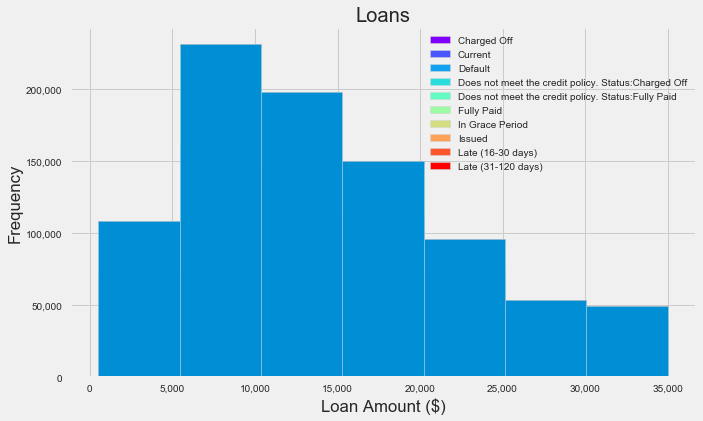

In [83]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

# create histogram of loan amounts
df.loan_amnt.hist(bins=7, edgecolor='lightblue', figsize=(10,6))

# setup titles
plt.title('Loans')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')

# setup labels
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

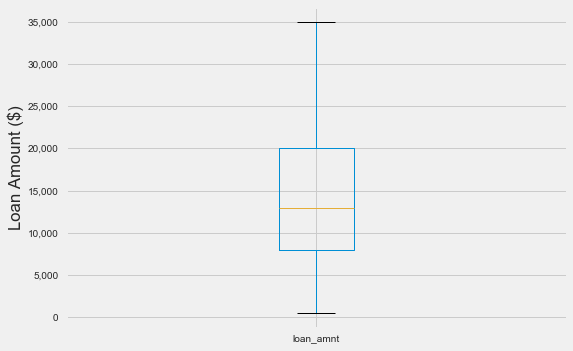

In [84]:
# let's see the statistics for these loans
df.loan_amnt.plot(kind='box')

# setup titles
plt.ylabel('Loan Amount ($)')

# setup labels
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

In [85]:
df.loan_amnt.describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

It appears that loans within the 7,500 - 20,000 range are most popular. Let's look at loans by status - 

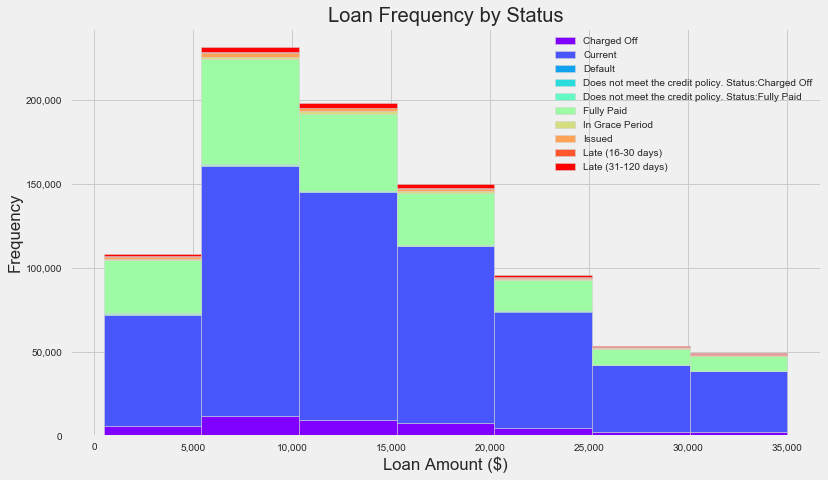

In [86]:
# Create a dictionary for each grouping of a loan status
dic_loan_status = {}
for label, data in df.groupby('loan_status')['loan_amnt']:
    dic_loan_status[label] = data

# create a dataframe
df_loan_status = pd.DataFrame(dic_loan_status)    

# create a colormap to represent each loan status
cm = plt.cm.rainbow
colors = cm(np.linspace(0, 1, len(df_loan_status.columns)))

# create histogram
df_loan_status.plot.hist(stacked=True, bins=7, figsize=(12,7), color=colors, edgecolor='lightgrey')

# setup titles
plt.title('Loan Frequency by Status')
plt.xlabel('Loan Amount ($)')

# setup labels
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

In [87]:
# what does each status look like? 
df_loan_status.describe()

,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
count,45248.000000,601779.000000,1219.000000,761.000000,1988.000000,207723.000000,6253.000000,8460.000000,2357.000000,11591.000000
mean,14556.293096,15241.880242,15193.847416,9527.233903,8853.231891,13346.350910,16005.741244,15298.587470,15670.661858,15569.308084
std,8393.421467,8497.000503,8315.960324,6404.598723,6163.442950,8057.388288,8683.852017,8887.907442,8786.578921,8517.062172
min,900.000000,1000.000000,1000.000000,500.000000,500.000000,500.000000,1000.000000,1000.000000,1000.000000,1000.000000
25%,8000.000000,8800.000000,9475.000000,5000.000000,4000.000000,7200.000000,9600.000000,8000.000000,9000.000000,9500.000000
50%,12675.000000,14000.000000,13675.000000,7750.000000,7200.000000,12000.000000,15000.000000,14000.000000,14400.000000,14000.000000
75%,20000.000000,20000.000000,20000.000000,12000.000000,12000.000000,18000.000000,21000.000000,21000.000000,20950.000000,20150.000000
max,35000.000000,35000.000000,35000.000000,25000.000000,25000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000


In [88]:
# what percentages does each loan status represent? 
dic = {}
for c in df_loan_status.columns:
    dic[c] = format(len(df[df.loan_status==c]) / len(df), '.3f')

for (status, per) in sorted(dic.items(), key= lambda x: x[1], reverse=True):
    print('{}: {}'.format(status, per))

Current: 0.678
Fully Paid: 0.234
Charged Off: 0.051
Late (31-120 days): 0.013
Issued: 0.010
In Grace Period: 0.007
Late (16-30 days): 0.003
Does not meet the credit policy. Status:Fully Paid: 0.002
Default: 0.001
Does not meet the credit policy. Status:Charged Off: 0.001


Nothing too extrodainary here.  We see that about 90% of loans are in the Current/Fully Paid statuses, meaning we are genreally doing pretty good with loans overall!

The means across all status' appear to be within the same loan amount (14,500 - 16,000).  


### 4.2 Explore Default vs Non-Default Loans
Do bad loans appear more frequently in higher loan amounts? 

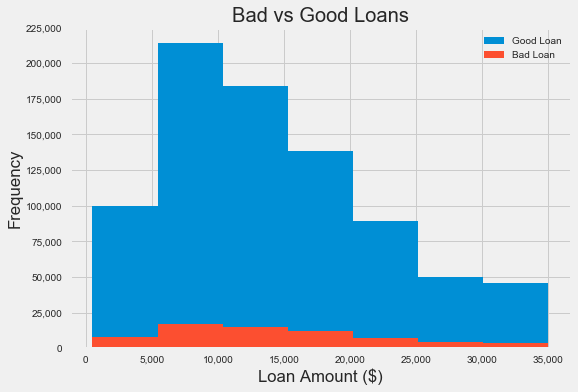

In [89]:
import matplotlib.patches as mpatches

# for example, can we say anything about loan amounts being related to whether they are good or bad? 
df.groupby('default_status').loan_amnt.plot.hist(bins=7)

# update titles
plt.title('Bad vs Good Loans')
plt.xlabel('Loan Amount ($)')

# setup labels
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# create legend
leg_legend = ['Good Loan', 'Bad Loan']
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, leg_legend)

plt.show()

As one would expect, the majority of loans appear to be good loans.  From an overall percentage wise, we don't see any significance in loan amounts to loan defaults. 

### 4.3 Explore Issue Date
Are there any trends in the loans over time? 

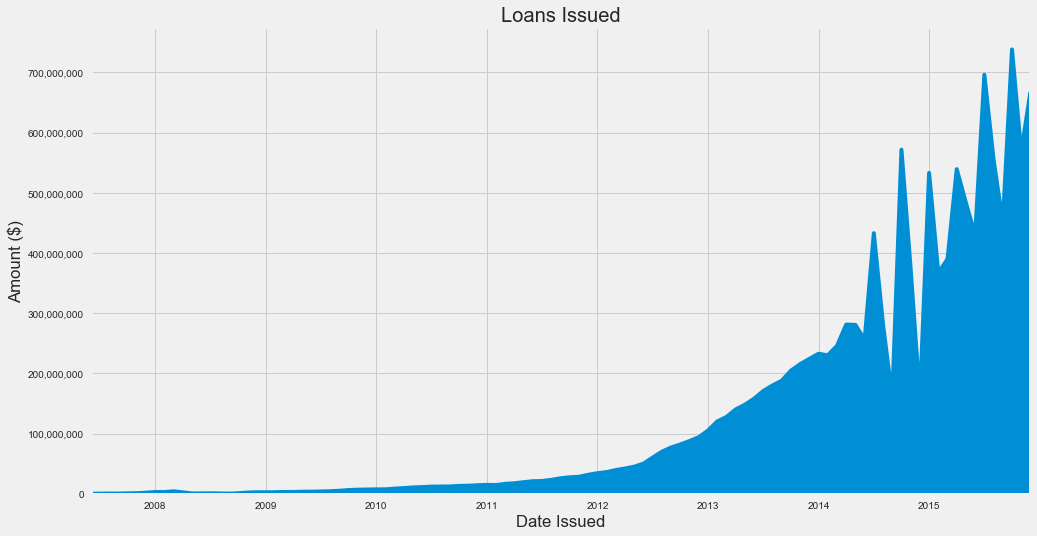

In [90]:
# group by date, and summarize by loan ammount, then plot
df.groupby('issue_d').loan_amnt.sum().plot.area(figsize=(15,8))

# set labels
plt.title('Loans Issued')
plt.ylabel('Amount ($)')
plt.xlabel('Date Issued')

# get current axis
ax = plt.gca()

# disable scientific notation on the y axis
ax.ticklabel_format(axis='y', style='plain')

# format values with comma
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


# -- For future reference --
# You need to specify axis if you want it to apply to only x or y
#
# disable scientific notation
## ax.ticklabel_format(style='plain')
#
# disable offset notation
## ax.ticklabel_format(useOffset=False)
#
# disable both offset & scientific
## ax.ticklabel_format(useOffset=False, style='plain')



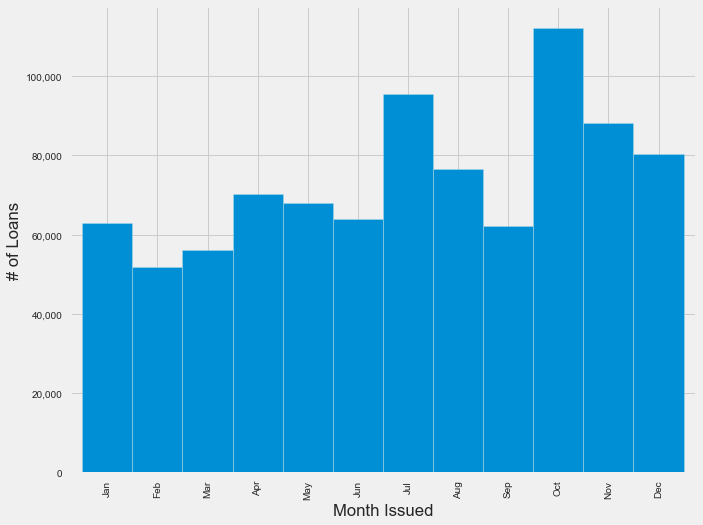

In [91]:
# we see spikes in this graphs - is there some seasonality to loans? 

# create plot
df.groupby('issue_month').loan_amnt.count().plot.bar(figsize=(10,8), width=1, edgecolor='lightblue')

# set labels
plt.ylabel('# of Loans')
plt.xlabel('Month Issued')

# get current axis
ax = plt.gca()

# format values with comma
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# format x axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(len(months)), months, rotation='vertical')

plt.show()

Based on the graphs above, we see that since it's inception, Lending Club has increased considerably.  There appears to be a trend of laons being issued at the beginning of each quarter. 

### 4.4 Explore Terms
Do terms have any diret correlation to bad loans? 

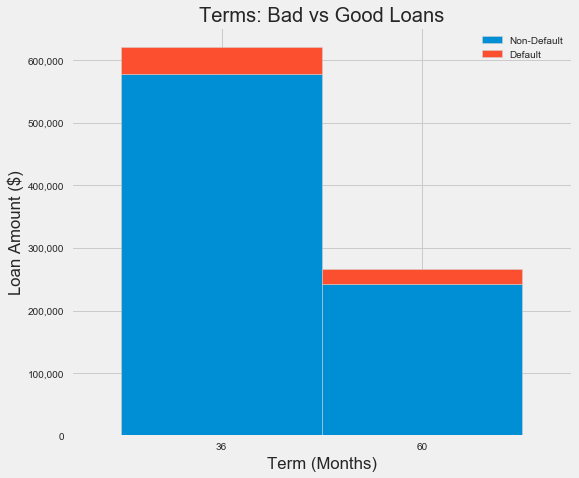

In [92]:
# create histogram
df.groupby(['term', 'default_status']).loan_amnt.count().unstack().plot.bar(figsize=(8,7),stacked=True, width=1, edgecolor='lightgrey')

# update titles
plt.title('Terms: Bad vs Good Loans')
plt.ylabel('Loan Amount ($)')
plt.xlabel('Term (Months)')

# setup labels
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# create legend
leg_legend = ['Non-Default', 'Default']
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, leg_legend)
plt.xticks(rotation='horizontal')

plt.show()

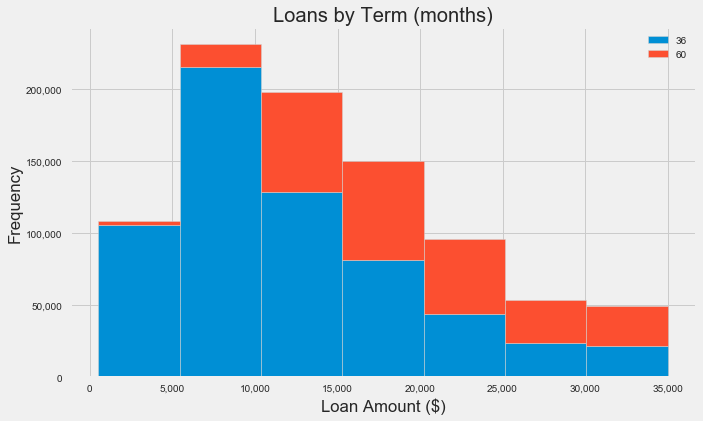

In [93]:
# Create a dictionary for each grouping of terms
dic_term = {}
for label, data in df.groupby('term')['loan_amnt']:
    dic_term[label] = data

# create a dataframe
df_term = pd.DataFrame(dic_term)    

# create histogram
df_term.plot.hist(stacked=True, bins=7, figsize=(10,6),edgecolor='lightgrey')

# setup titles
plt.title('Loans by Term (months)')
plt.xlabel('Loan Amount ($)')

# setup labels
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

Majority of loans are 36 months, and do not seem to impact the default status.  However, it does appear that the larger the loan size, the more likely a borrower will have a 60 month term. 

### 4.5 Explore Grade
How do loan grades impact loan amounts & status? 

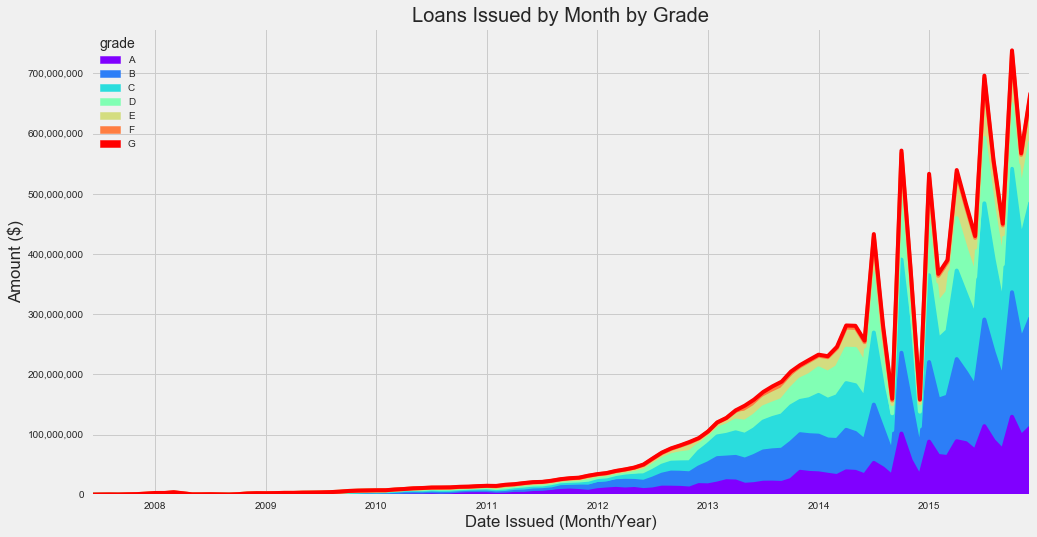

In [94]:
# find number of grades
grades = df.grade.unique()

# create a colormap to represent each grade
cm = plt.cm.rainbow
colors = cm(np.linspace(0, 1, len(grades)))

# create plot
df.groupby(['issue_d', 'grade']).loan_amnt.sum().unstack().plot.area(figsize=(15,8), color=colors)

# set labels
plt.title('Loans Issued by Month by Grade')
plt.ylabel('Amount ($)')
plt.xlabel('Date Issued (Month/Year)')

# get current axis
ax = plt.gca()

# disable scientific notation on the y axis
ax.ticklabel_format(axis='y', style='plain')

# format values with comma
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

In [95]:
# what does this look like percentage wise?
for group, data in df.groupby(['grade']).default_status:
    print('Grade: {0} Bad({1:.2f}) Good({2:.2f})'.format(group, np.sum(data==1)/len(data), np.sum(data==0)/len(data)))

Grade: A Bad(0.02) Good(0.98)
Grade: B Bad(0.05) Good(0.95)
Grade: C Bad(0.08) Good(0.92)
Grade: D Bad(0.11) Good(0.89)
Grade: E Bad(0.14) Good(0.86)
Grade: F Bad(0.19) Good(0.81)
Grade: G Bad(0.23) Good(0.77)


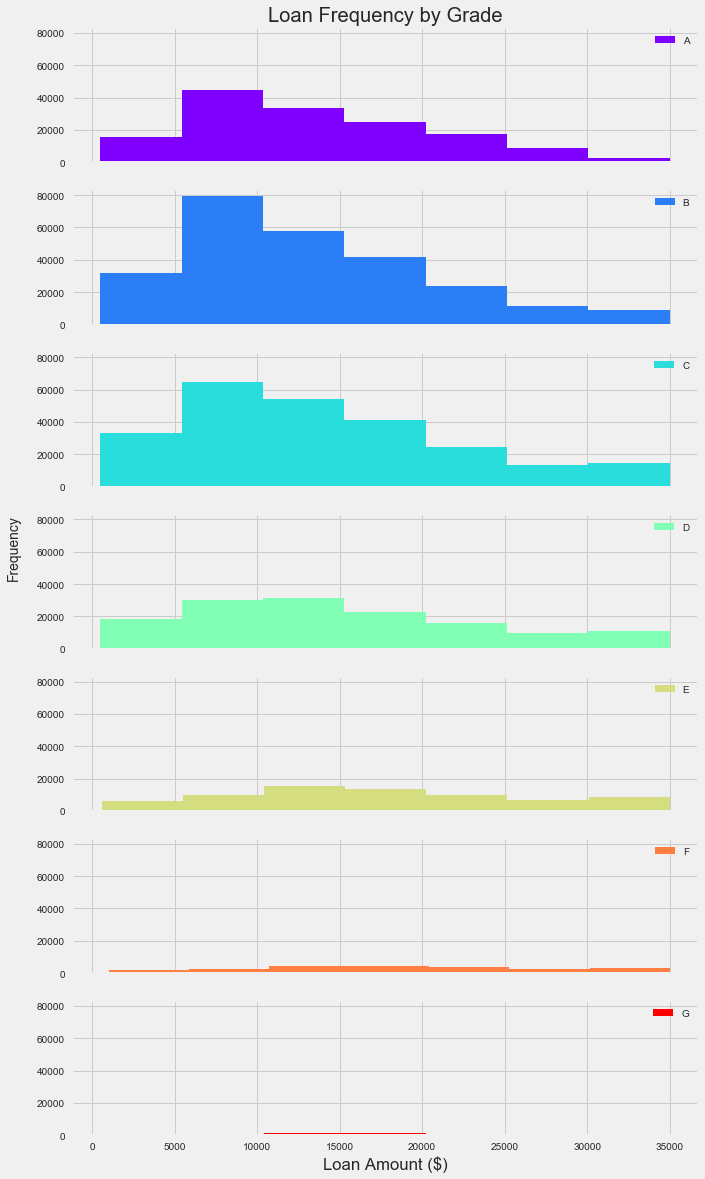

In [96]:
# what do we look like for loan amounts per grade? 

fig, axs = plt.subplots(7, sharex=True, sharey=True, figsize=(10,19))

for i, g in enumerate(sorted(grades)):
    line = axs[i].hist(df[df.grade==g].loan_amnt, bins=7, color=colors[i], label=g)
    axs[i].legend()

# Set labels
axs[0].set_title('Loan Frequency by Grade')
plt.xlabel('Loan Amount ($)')
fig.text(0., 0.5, 'Frequency', ha='center', va='center', rotation='vertical')


plt.show()
    

As one would expect, the worse the loan grade, the more likley it is to go into default.  We also see that loans of grade B & C are more frequent than A grades. 

### 4.6 Explore Interest Rates
How do interest rates impact loan amounts and deafult status?

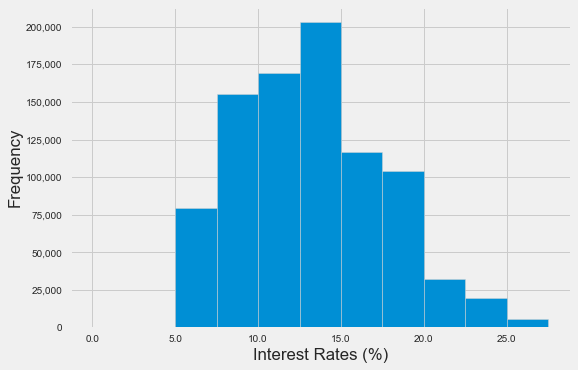

In [97]:
# setup bins
bins = np.arange(0, 30, 2.5)

# create the histogram
df.int_rate.plot.hist(bins=bins, edgecolor='lightgrey')

# set titles
plt.xlabel('Interest Rates (%)')

# setup labels
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

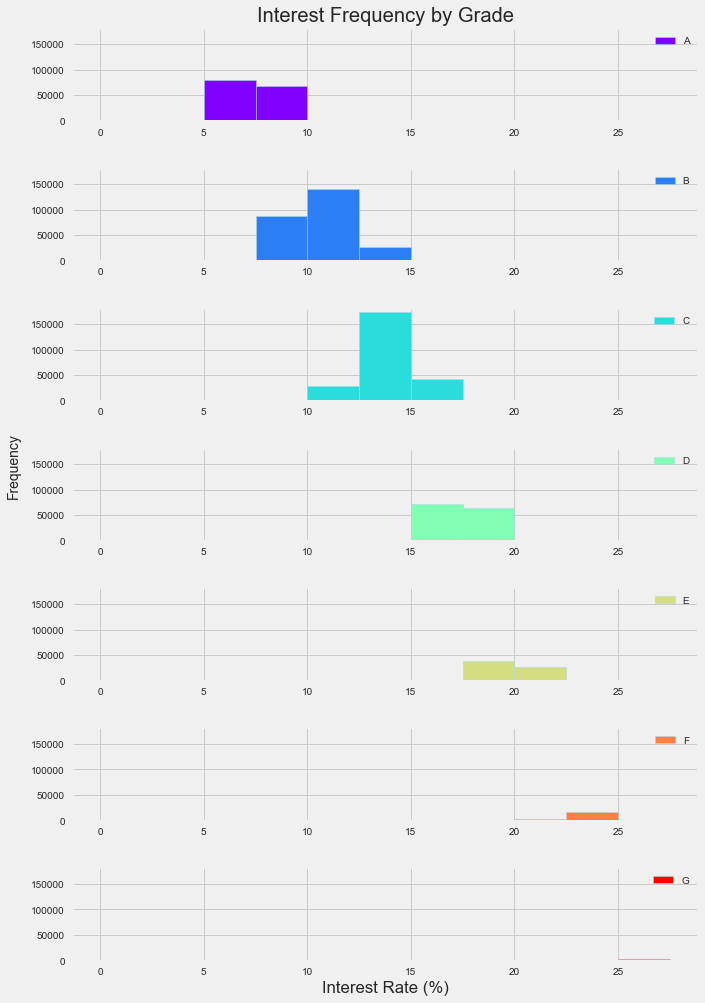

In [98]:
# what do we look like for loan amounts per grade? 
fig, axs = plt.subplots(len(grades), sharey=True, figsize=(10,16))

for i, g in enumerate(sorted(grades)):
    line = axs[i].hist(df[df.grade==g].int_rate, bins=bins, color=colors[i], label=g, edgecolor='lightblue')
    plt.xlabel('Interest Rate (%)')
    axs[i].legend()

# Set labels
axs[0].set_title('Interest Frequency by Grade')
fig.text(0., 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0.5)

plt.show()

Inline with our previous exploration of loan grades - as the loan grad worsens, the interest rate increases.  The mean interest rate falls within the 12.5 - 15% range.

### 4.7 Explore Home Ownership
How does home ownership play into the number of loans? 

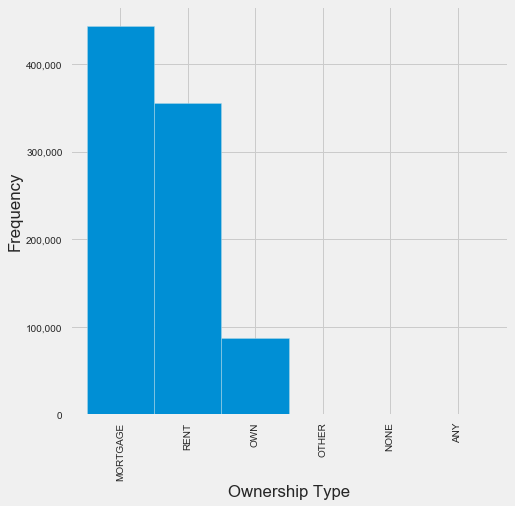

In [100]:
# create graph
df.home_ownership.value_counts().plot(kind='bar', figsize=(7, 7), width=1, edgecolor='lightblue')

# set labels
plt.xlabel('Ownership Type')
plt.ylabel('Frequency')

# get current axis
ax = plt.gca()

# format y label ticks
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

In [417]:
df.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

We see that home ownership of 'mortgage, rent, own' make up the majority of loans

### 4.8 Explore Purpose
What are the reasons for the loans being issues? 

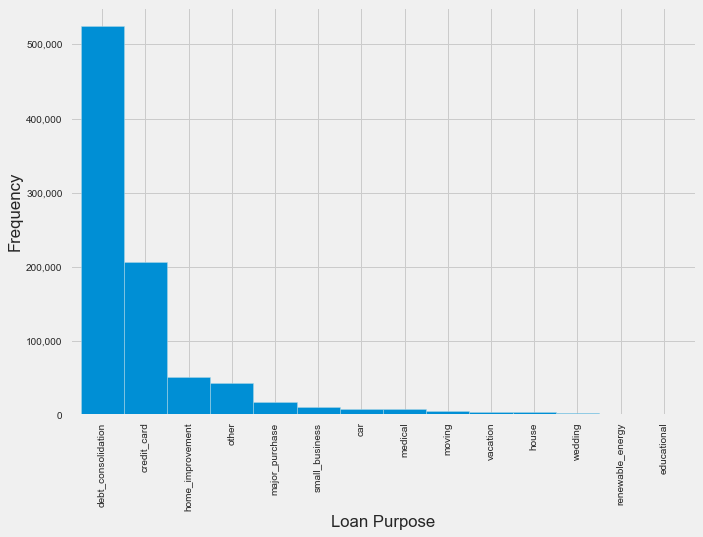

In [101]:
# create graph
df.purpose.value_counts().plot(kind='bar', figsize=(10, 7), width=1, edgecolor='lightblue')

# set labels
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')

# get current axis
ax = plt.gca()

# format y label ticks
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

In [103]:
# Do we know what types of loans have the best chance of being repaid? 

loans = []

for p in df.purpose.unique():
    good = np.sum([(df.purpose==p) & (df.default_status==0)]) / np.sum(df.purpose==p)
    bad = np.sum([(df.purpose==p) & (df.default_status==1)]) / np.sum(df.purpose==p)

    loans.append([p, good, bad])

loans = pd.DataFrame(loans)
loans.columns = ['Purpose', 'Non-default', 'Default']
loans.set_index('Purpose', inplace=True)
loans.sort_values('Non-default')

,Non-default,Default
Purpose,,
educational,0.791962,0.208038
small_business,0.828370,0.171630
renewable_energy,0.874783,0.125217
wedding,0.876864,0.123136
house,0.887510,0.112490
moving,0.887883,0.112117
other,0.902947,0.097053
medical,0.905855,0.094145
vacation,0.915118,0.084882


We see that the majority of loans are for paying debt consoildation, and that educational loans tend to have the highest default rate

### 4.9 Explore By State
Where are the majority of loans being issued?

In [106]:
import folium
import json
import os

# create dataframe for loan amount grouped by state
df_amnt_by_state = df[['addr_state', 'loan_amnt']].groupby('addr_state').sum().reset_index()

# scale amounts by 10's of millions
dic_amnt_by_state = df_amnt_by_state.set_index('addr_state').loan_amnt / 10000000


In [109]:
import branca.colormap as cm

# create a color scale
linear = cm.linear.OrRd.to_step(8).scale(
    dic_amnt_by_state.min(), 
    dic_amnt_by_state.max())

linear

In [111]:
# create the map
m = folium.Map(location=[48, -102], zoom_start=4)

# load the geojson of the US states
geo_json_data = json.load(open('../data/external/us_states.json'))

# add the geojson to the map
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': linear(dic_amnt_by_state.loc[feature['id']]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.8}
).add_to(m)

# add the scale
linear.caption = 'Loan Amounts (100s of Millions)'
m.add_child(linear)

# show the map
m

We see that california has the highest loans, followed by new york and texas. 

## 5. Correlation
Let's see how our variables are related

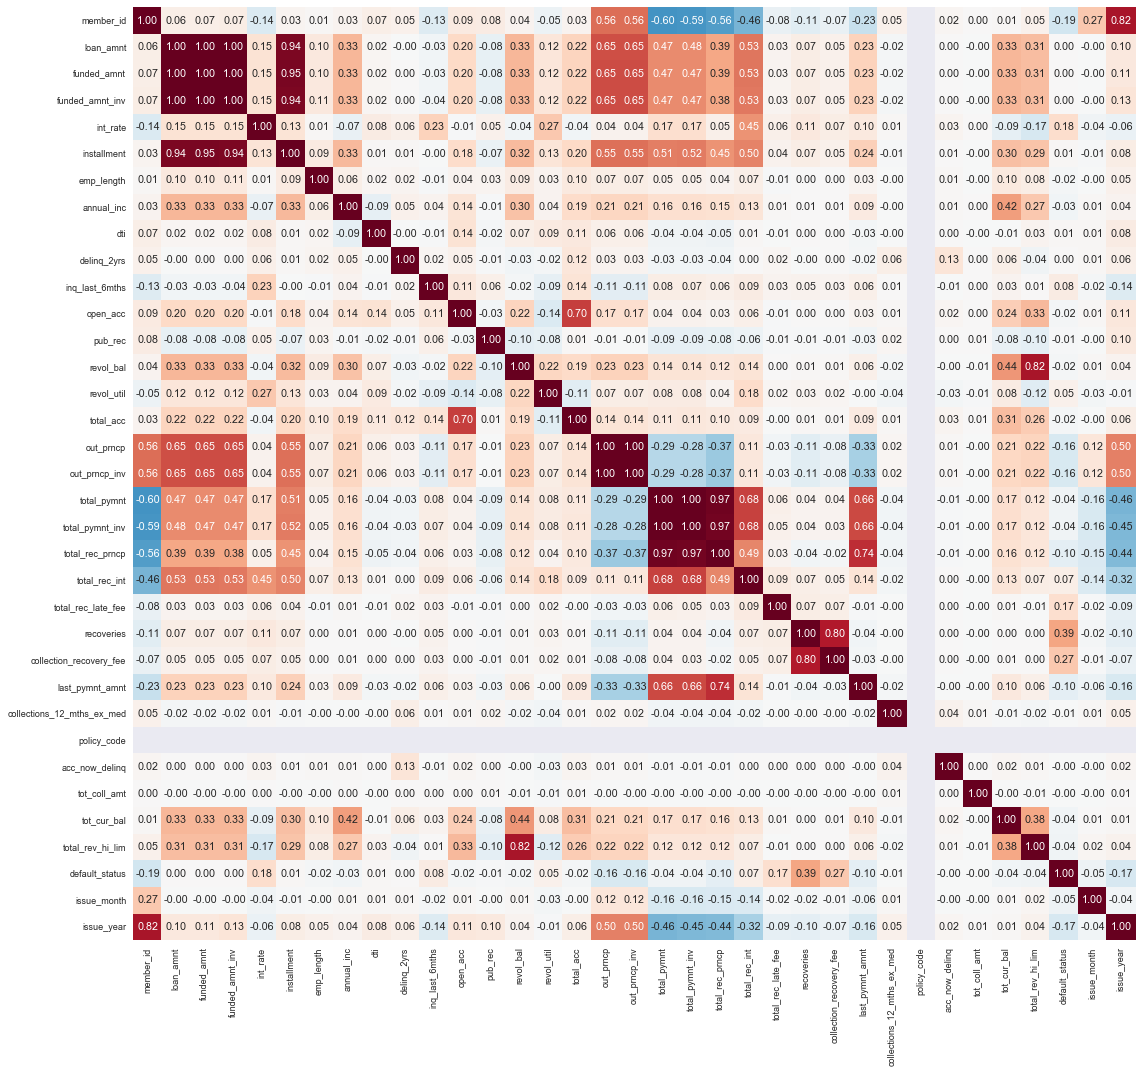

In [112]:
sns.set(font_scale=.9)
fig, ax = plt.subplots(figsize=(16,16))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, fmt=".2f", cbar=False)
plt.show()

We see some correlation between default status and -
* interest rate
* inq_last_6months
* recoverables
* total_rec_late_fees
* collectin_recovery_fee
* last_pymnt_amnt
* issue_year

We also see that some variables will not be needed for the next step in our analysis where we will begin to build a model. 

The following columns have been determined to bring little to no value to our model and will be removed:

* member_id
    * A unique value for the purpose of uniquely identifying the loan - this offers no value to us.

* policy_code (1)
    * The same value (1) occurs for every record.

* total_rec_int
    * Interest received to date - related to re-payment and will not be used for this analysis. 
    
* total_rec_prncp
    * related to re-payment and will not be used for this analysis. 

* total_pymnt_inv
    * related to re-payment and will not be used for this analysis.

* total_pymnt
    * related to re-payment and will not be used for this analysis.

* tot_cur_bal
    * refers to the amount left on the loan
    
* tot_coll_amt
    * refers to the collected amount
    
* total_rev_hi_lim
    * Total revolving high credit/credit limit

* zip_code
    * We are going to utlize the state for this analysis


In [113]:
## Delete columns
del_cols = ['member_id', 
            'policy_code',
            'total_rec_int',
            'total_rec_prncp',
            'total_pymnt_inv',
            'total_pymnt',
            'tot_coll_amt',
            'tot_cur_bal',
            'total_rev_hi_lim',
            'zip_code']

df.drop(del_cols, axis=1, inplace=True)

## 6. Export
Let's export our dataframe to a CSV so that we have a fresh dataset to begin out model building

In [115]:
# export to csv
df.to_csv('./../data/processed/LCdata_processed.csv')